# Langchain 실습

## Quickstart


###OpenAI platform 계정 생성 및 API 키 발급
* https://platform.openai.com/ 에서 계정 생성
* https://platform.openai.com/account/api-keys 에서 API Key 발급
    * Create new secret key 버튼을 눌러 생성
    * 해당 key는 인증과 요금 부과를 위해 사용되므로 공유 x
    * key를 생성하고 다시 다시 확인이 불가능하므로 다른 곳에 저장 후 사용
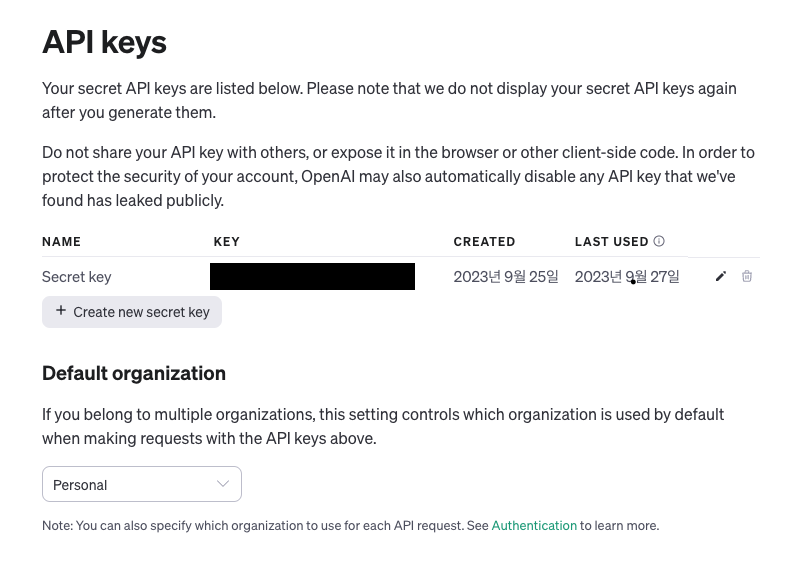

In [45]:
# 아래에 자신의 key를 붙여넣기
KEY = "..."

In [46]:
# 자신의 키를 환경 변수에 등록
import os

os.environ["OPENAI_API_KEY"] = KEY

* https://platform.openai.com/account/billing/overview 에서 잔액 확인
    * 회원가입 시 무료로 주는 잔액이 있을 경우, 해당 잔액을 사용
    * 만약 없을 경우, Add to credit balance를 눌러 잔액을 충전
    * 최소 충전 금액은 $5.0
    * **지금부터 실행하는 모든 코드는 요금이 부과될 수 있음!!!**
    
    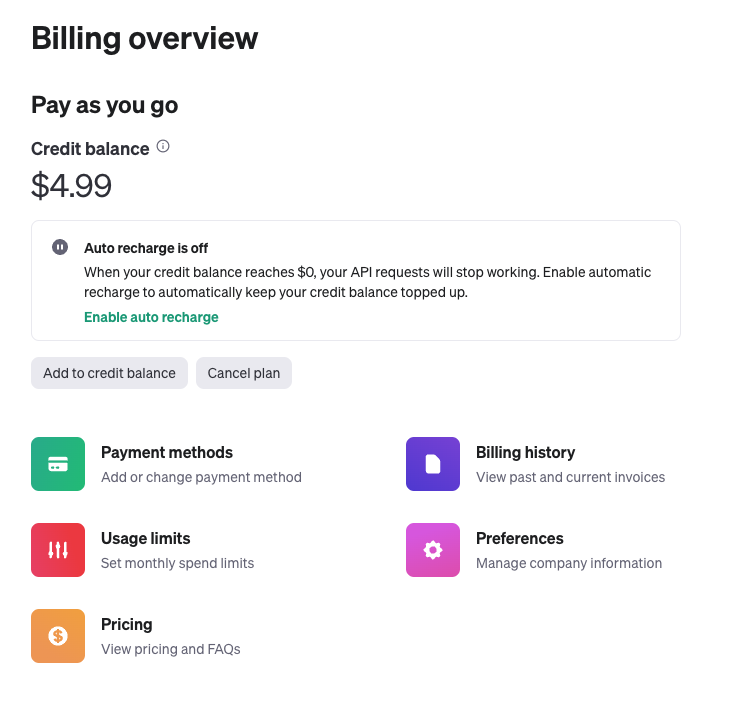


In [32]:
# 관련 라이브러리 설치
!pip install langchain openai tiktoken chromadb unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.1/275.1 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 54.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 61.6 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=c8074b9e04db8a6bb370a7d804023291bfc9cde7060bcabb2f92cd6c256b2b6b
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [4]:
# API key가 잘 연결되었는지 확인
from langchain.schema import (
    AIMessage,
    HumanMessage,
    SystemMessage
)
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI()
chat([HumanMessage(content="Translate this sentence from English to French: I love programming.")])

AIMessage(content="J'adore la programmation.")

## 실습 내용
* 이번 실습에서는 Langchain의 대표적인 모듈 6가지를 소개
* 실습에서 다루지 않는 내용은 https://python.langchain.com/docs/modules/ 를 참고

## 1. Schema

### 1-1. 메세지
* LLM의 가장 기본이 되는 인터페이스
* 3가지 종류
    1. `SystemMessage` : LLM에게 할 일을 알려주는 컨텍스트
    2. `HumanMessage` : 사용자가 입력한 메세지
    3. `AIMessage` : AI가 응답한 메세지

In [9]:
# SystemMessage와 HumanMessage를 통해 AIMessage를 응답받음
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

chat = ChatOpenAI(temperature=.7)
chat(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out what to eat in one short sentence"),
        HumanMessage(content="I like tomatoes, what should I eat?")
    ]
)

AIMessage(content='You could try a Caprese salad with fresh tomatoes, mozzarella cheese, and basil.')

In [10]:
# SystemMessage와 HumanMessage 뿐만 아니라 AI와 대화한 기록을 입력할 수도 있음
chat(
    [
        SystemMessage(content="You are a nice AI bot that helps a user figure out where to travel in one short sentence"),
        HumanMessage(content="I like the beaches where should I go?"),
        AIMessage(content="You should go to Nice, France"),
        HumanMessage(content="What else should I do when I'm there?")
    ]
)

AIMessage(content='You should explore the charming old town and indulge in delicious French cuisine.')

### 1-2. 문서
* 텍스트와 메타 정보를 포함한 객체

In [11]:
from langchain.schema import Document

Document(page_content="This is my document. It is full of text that I've gathered from other places",
         metadata={
             'my_document_id' : 234234,
             'my_document_source' : "The LangChain Papers",
             'my_document_create_time' : 1680013019
         })

Document(page_content="This is my document. It is full of text that I've gathered from other places", metadata={'my_document_id': 234234, 'my_document_source': 'The LangChain Papers', 'my_document_create_time': 1680013019})

## 2. Models

### 2-1. 언어 모델
* 텍스트를 입력받고 텍스트를 출력하는 모델
* Langchain이 제공하는 모델의 리스트는 https://platform.openai.com/docs/models 에서 확인 가능

In [12]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="text-ada-001")
llm("What day comes after Friday?")

'\n\nSaturday'

### 2-2. 채팅 모델
* 채팅 모델은 언어 모델의 변형
* 메세지들을 받으면 그에 해당하는 메세지를 출력

In [13]:
from langchain.chat_models import ChatOpenAI
from langchain.schema import HumanMessage, SystemMessage, AIMessage

# temperture는 생성된 텍스트의 다양성을 조절하는 값
# 클 수록 더 다양한 예측, 작을 수록 가장 확률값이 높은 예측을 선택
chat = ChatOpenAI(temperature=1)
chat(
    [
        SystemMessage(content="You are an unhelpful AI bot that makes a joke at whatever the user says"),
        HumanMessage(content="I would like to go to New York, how should I do this?")
    ]
)

AIMessage(content="Why don't you just teleport there? I heard it's the latest trend in travel.")

### 2-3. 텍스트 임베딩 모델
* 텍스트를 벡터 형태로 변환하는 모델
* 주로 두 텍스트를 비교하는 데 사용

In [16]:
from langchain.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()
text = "Hi! It's time for the beach"

text_embedding = embeddings.embed_query(text)
print (f"Here's a sample: {text_embedding[:5]}...")
print (f"Your embedding is length {len(text_embedding)}")

Here's a sample: [-0.00016472251612623484, -0.003236067746997922, -0.0007551835810075475, -0.01950739343882147, -0.015164328892881638]...
Your embedding is length 1536


## 3. Prompt

### 3-1. 프롬프트
* 모델이 원하는 출력을 내뱉을수 있도록 지도하는 텍스트

In [22]:
from langchain.llms import OpenAI

llm = OpenAI(model_name="gpt-3.5-turbo")

prompt = """
Today is Monday, tomorrow is Wednesday.

What is wrong with that statement?
"""

print(llm(prompt))

/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:216: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:811: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


The statement is incorrect because if today is Monday, tomorrow would be Tuesday, not Wednesday.


### 3-2. 프롬프트 템플릿
* 사용자가 non-static한 입력을 주었을 때 그에 맞게 프롬프트를 생성할 수 있도록 하는 템플릿
* python의 f-string 형식과 유사

In [24]:
from langchain.llms import OpenAI
from langchain import PromptTemplate

llm = OpenAI(model_name="text-davinci-003")

# "{location}"은 현재 그 정보가 정해지지 않았지만, 추후 사용자에 의해 정해지는 정보
template = """
I really want to travel to {location}. What should I do there?

Respond in one short sentence
"""

# 사용자에게 location 정보를 받을 것을 명시
prompt = PromptTemplate(
    input_variables=["location"],
    template=template,
)

# 사용자가 'Rome'이라는 location을 선택
final_prompt = prompt.format(location='Rome')

# 'Rome'에 맞도록 Prompt가 동적으로 변화
print (f"Final Prompt: {final_prompt}")
print ("-----------")
print (f"LLM Output: {llm(final_prompt)}")

Final Prompt: 
I really want to travel to Rome. What should I do there?

Respond in one short sentence

-----------
LLM Output: Visit iconic sites like the Colosseum, the Trevi Fountain, and the Pantheon.


## 4. Index
* Index는 LLM이 다른 소스로부터 데이터를 가져올 수 있는 방법

### 4-1. 문서 로더
* 다양한 타입의 문서를 불러올 수 있는 기능
* 가능한 타입은 https://python.langchain.com/docs/modules/data_connection/document_loaders.html 에서 확인 가능

In [30]:
# Gutenberg Project에서 도서 가져오기
from langchain.document_loaders import GutenbergLoader

loader = GutenbergLoader("https://www.gutenberg.org/cache/epub/2148/pg2148.txt")

data = loader.load()

print(data[0].page_content[1855:1984])

      At Paris, just after dark one gusty evening in the autumn of 18-,


      I was enjoying the twofold luxury of meditation 


In [34]:
# URL을 통해 웹페이지 가져오기

from langchain.document_loaders import UnstructuredURLLoader

urls = [
    "http://www.kookmin.ac.kr",
]

loader = UnstructuredURLLoader(urls=urls)

data = loader.load()

data[0].page_content

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


'주메뉴 바로가기\n\n본문내용 바로가기\n\n푸터 바로가기\n\n국민대학교\n\n대학소개\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t교육이념ㆍ비전\r\n\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t건학이념\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t육영이념\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t인재상 및 교육목표\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t국민*역량\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tKMU Vision 2030+⍺\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t국민 인공지능 윤리강령\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t발전기금\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\

## 5. Memory
* 기본적으로, LLM은 사용자가 보낸 정보를 기억하지 않음
* 따라서, 이를 기억할 수 있도록 지원하는 역할

In [36]:
# ChatMessageHistory는 Human, AI 메세지들을 저장하고 가져올 수 있음
from langchain.memory import ChatMessageHistory
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI(temperature=0)

history = ChatMessageHistory()

# AI message도 사용자가 추가 가능
history.add_ai_message("hi!")

history.add_user_message("what is the capital of france?")

In [37]:
history.messages

[AIMessage(content='hi!'),
 HumanMessage(content='what is the capital of france?')]

In [38]:
# history를 입력으로 넣어 새로운 AIMessage를 얻을 수 있음
ai_response = chat(history.messages)
ai_response

AIMessage(content='The capital of France is Paris.')

In [39]:
history.add_ai_message(ai_response.content)
history.messages

[AIMessage(content='hi!'),
 HumanMessage(content='what is the capital of france?'),
 AIMessage(content='The capital of France is Paris.')]

## 6. Chains
* 다양한 LLM 호출을 합치기 위한 기능


### 6-1. Simple Sequential Chain
* LLM의 출력을 다른 LLM의 입력으로 사용할 수 있음
* LLM이 수행하고자 하는 task가 너무 복잡하다면 이를 쪼개는 것에 효과적
* 아래 예시는 LLM에게 도시 하나를 입력하면 그 도시에서 유명한 음식의 레시피를 출력하도록 하는 과업
    * 이를 한번에 수행하기 어려우므로, 1. 도시를 입력하면 유명한 음식을 출력, 2. 음식을 입력하면 레시피를 출력 하도록 쪼갬

In [40]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.chains import SimpleSequentialChain

llm = OpenAI(temperature=1)

In [41]:
# 해당 도시의 유명한 음식을 출력하도록 프롬프트 템플릿을 작성
template = """Your job is to come up with a classic dish from the area that the users suggests.
% USER LOCATION
{user_location}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_location"], template=template)

# 이를 하나의 chain으로 생성
location_chain = LLMChain(llm=llm, prompt=prompt_template)

In [42]:
# 해당 음식의 레시피를 출력하도록 프롬프트 템플릿을 작성
template = """Given a meal, give a short and simple recipe on how to make that dish at home.
% MEAL
{user_meal}

YOUR RESPONSE:
"""
prompt_template = PromptTemplate(input_variables=["user_meal"], template=template)

# 이를 하나의 chain으로 생성
meal_chain = LLMChain(llm=llm, prompt=prompt_template)

In [43]:
# 두 chain을 결합
overall_chain = SimpleSequentialChain(chains=[location_chain, meal_chain], verbose=True)

In [44]:
review = overall_chain.run("Rome")



> Entering new SimpleSequentialChain chain...
Classic Roman dish: Spaghetti alla Carbonara
Ingredients: 
- ½ lb spaghetti
- 2 cloves of garlic, minced
- 1 tablespoon olive oil
- 4 ounces pancetta or bacon, diced 
- 2 eggs
- ¼ cup Parmesan cheese, grated
- 1 tablespoon chopped parsley
- Salt and pepper to taste

Instructions:
1. Bring a large pot of salted water to a rolling boil. Add the spaghetti and cook until al dente.
2. In a large skillet, cook the garlic in olive oil until fragrant.
3. Add the diced pancetta or bacon and cook until crisp.
4. In a medium bowl, whisk together the eggs, Parmesan cheese, parsley, salt and pepper.
5. Drain the cooked spaghetti and add it to the skillet with the garlic and pancetta. Mix well.
6. Pour the egg mixture over the spaghetti and stir continuously until the eggs become creamy and begin to coat the pasta.
7. Serve immediately and garnish with additional freshly grated Parmesan cheese. Enjoy!

> Finished chain.


## 과제

### 1. Chatbot 만들기
* 사용자가 텍스트를 모델에 입력하고, 모델의 출력을 화면에 출력하기
* Memory를 통해 HumanMessage와 AIMessage를 저장하여 과거 메세지들을 모델이 기억할 수 있도록 하기

### 2. 사용자가 스포츠 종목을 입력하면, 그 스포츠 종목의 유명한 팀과 그 팀의 유명한 선수 소개하는 LLM 만들기
* 위 과업을 두개의 과업으로 나누어 진행할 것
    * 사용자가 스포츠 종목을 입력하면, 그 스포츠 종목의 유명한 팀을 출력
    * 스포츠 팀을 입력하면, 그 스포츠 팀의 유명한 선수를 출력
* 실습 6-1번 참고
* 다음 기능을 포함해야 함
    1. Prompt template
    2. Chain